In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import numpy as np
from mcu_chamfer import MCUChamferModel
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle

In [43]:
figure_num = 20**2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
seed = 123
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed=seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=7, c=0.13, figures=figures, params=control_vars, params_names=param_names)


In [44]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 07 12:06:05 AM: Your problem has 160000 variables, 2680 constraints, and 0 parameters.
(CVXPY) May 07 12:06:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 07 12:06:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 07 12:06:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 07 12:06:05 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 07 12:06:05 AM: Compiling problem (target solver=SCS)

In [45]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 0.00031139453855635424
Average number of neighbors: 6.695
1. Constraint: trace(var608665) <= 51.870000000000005
   Residual: 4.27749053426858
2. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var608665) == 0.0
   Residual: 0.0003036290422609965
3. Constraint: var608665[58, 0:400][58] + var608665[325, 0:400][325] + -2.0 @ var608665[58, 0:400][325] == 0.14858682963183195
   Residual: 0.0001520733101951499
4. Constraint: var608665[325, 0:400][325] + var608665[58, 0:400][58] + -2.0 @ var608665[325, 0:400][58] == 0.14858682963183195
   Residual: 0.0001520733101951499
5. Constraint: var608665[60, 0:400][60] + var608665[140, 0:400][140] + -2.0 @ var608665[60, 0:400][140] == 0.15450624433866286
   Residual: 0.00014774663363412155


In [55]:
t=12
ind = np.argsort(mcu_model.dists[t])
mcu_model.dists[t, ind]

array([0.        , 0.09683627, 0.13770058, 0.14854667, 0.15401845,
       0.16902207, 0.18502636, 0.19327502, 0.19669014, 0.20085127,
       0.20221026, 0.20612091, 0.20615541, 0.20776695, 0.20777664,
       0.20784382, 0.2158986 , 0.21704421, 0.22216173, 0.22271732,
       0.24375764, 0.25062207, 0.25241907, 0.26455974, 0.26482258,
       0.26544703, 0.26575469, 0.27063252, 0.27286915, 0.27468673,
       0.27479961, 0.28011885, 0.28695155, 0.2888242 , 0.29667458,
       0.3086079 , 0.31083843, 0.31112623, 0.31644875, 0.31693783,
       0.32058694, 0.32074787, 0.32302259, 0.32355752, 0.32842034,
       0.32879811, 0.33333501, 0.33537558, 0.34216675, 0.34242989,
       0.35383258, 0.35606933, 0.36681938, 0.36740575, 0.36993302,
       0.37160325, 0.37238051, 0.37412446, 0.37600281, 0.3763092 ,
       0.37982535, 0.38388554, 0.38622222, 0.39261982, 0.39301104,
       0.39331375, 0.39397778, 0.39477753, 0.39593397, 0.39690213,
       0.39848138, 0.40083877, 0.40179551, 0.40327228, 0.40349

[0.19328732 0.19743809 0.20128167 0.20408132 0.20762176 0.21342858
 0.21701303]
0.7380746472339581 10.108697970178838 1.0108997193415474 10.11956235678782


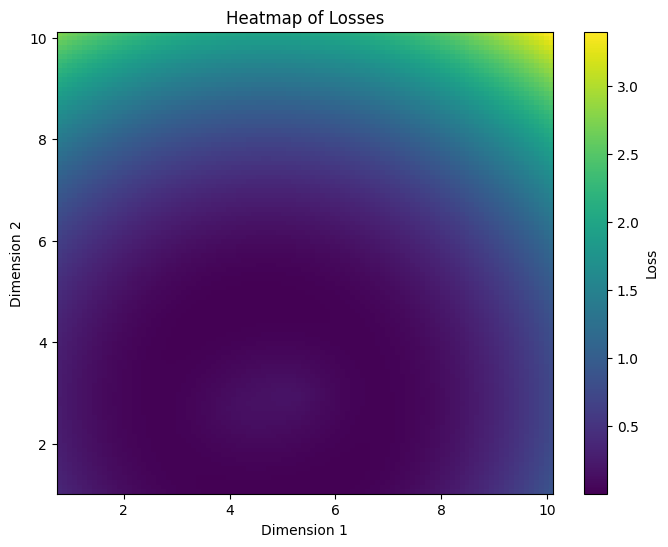

Finding neighbors: 344 ms , optimization: 156 ms
x_opt = [4.12013121 4.68033513], x_err = 0.002301050043134386
x_real = [5 3]


In [56]:
test_control_vars = np.array([[5, 3]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, roll_generator.generate_swiss_roll,
                                                           noise_level=noise_level,
                                                           min_num_points=200)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=7, symmetric=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")

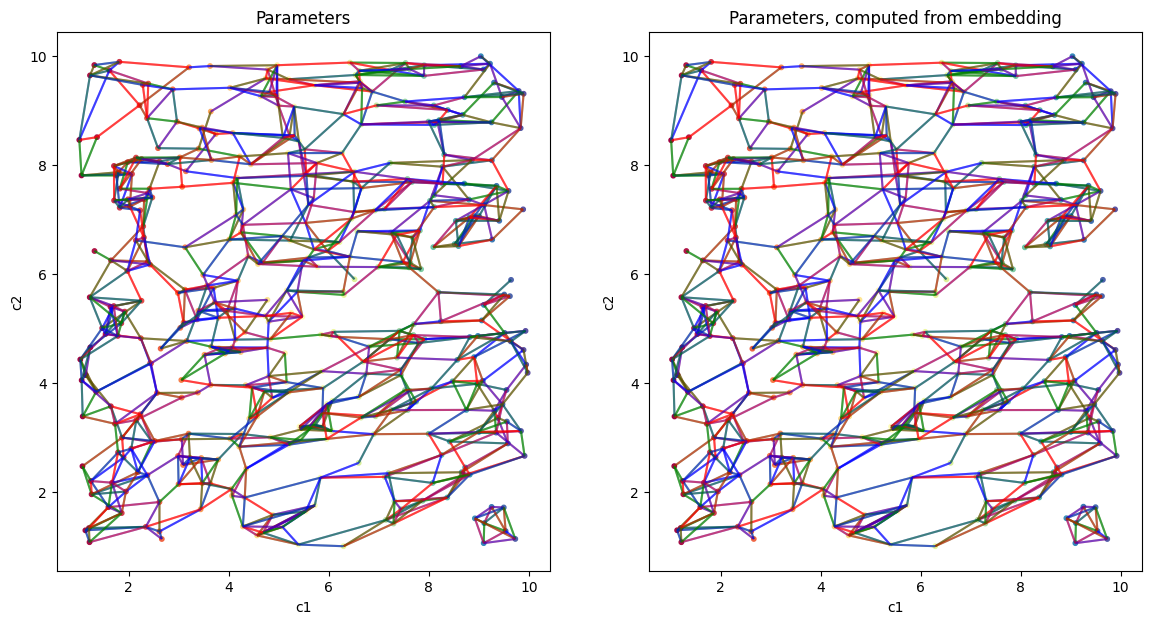

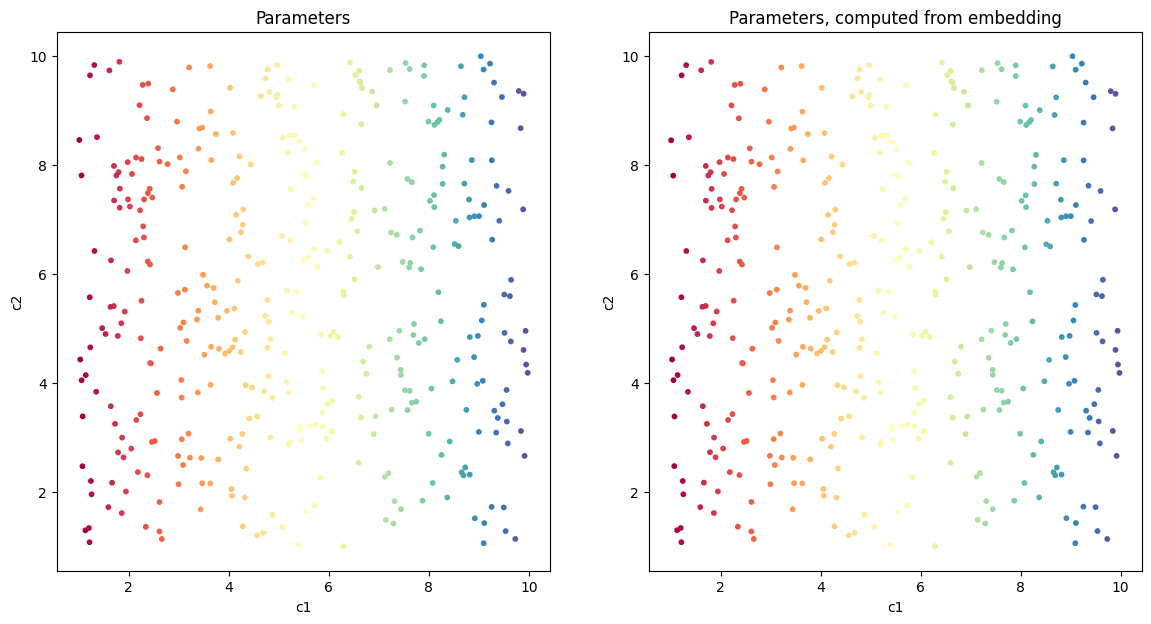

In [47]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [48]:
mcu_experiments = MCUexperiments(mcu_model)
k=7
pieces = 8
test_size = 50
seed = 153
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt=200, k=k, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

[0.09236006 0.0959143  0.10439953 0.10671471 0.1091394  0.10983822
 0.11054946]
Finding neighbors: 107 ms , optimization: 1 ms
-----------
x_opt  = [1.62370724 2.35682588], x_err = 0.004007853208785599
x_real = [2.05207612 1.61205453]
[0.08921819 0.1004931  0.1038361  0.10535306 0.11827485 0.11880891
 0.1192614 ]
Finding neighbors: 114 ms , optimization: 1 ms
-----------
x_opt  = [0.73807465 2.55050926], x_err = 0.002371848693313604
x_real = [1.12485394 1.96367171]
[0.07667683 0.09504619 0.09689861 0.09979032 0.10482556 0.1187086
 0.11904433]
Finding neighbors: 111 ms , optimization: 1 ms
-----------
x_opt  = [0.73807465 2.43243091], x_err = 0.0030664224490458847
x_real = [1.42992687 2.06864192]
[0.07799418 0.07987913 0.08809032 0.09988774 0.10511063 0.11431869
 0.11722014]
Finding neighbors: 111 ms , optimization: 1 ms
-----------
x_opt  = [0.73807465 2.00446779], x_err = 0.0043995934833325565
x_real = [1.43374455 1.65380284]
[0.10593237 0.11797356 0.11988569 0.12854189 0.15295403 0.1

In [ ]:
interval_runs_sym, intervals_sym = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt=200, k=k, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

In [7]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt=200, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, baseline=True, seed = seed)

-----------
x_opt  = [1.85754514 1.6099475 ], x_err = 0.03782794584080396
x_real = [2.05207612 1.61205453]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 0.04757859897876726
x_real = [1.12485394 1.96367171]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 0.038879558041733896
x_real = [1.42992687 2.06864192]
-----------
x_opt  = [1.20093463 1.33460388], x_err = 0.030125440583715215
x_real = [1.43374455 1.65380284]
-----------
x_opt  = [2.65904189 1.13405425], x_err = 0.059899875165149254
x_real = [2.03546739 1.00922806]
-----------
x_opt  = [2.33880231 1.35753953], x_err = 0.0444270273243744
x_real = [2.09425758 1.26271899]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 0.04873385759702168
x_real = [1.08961815 1.94464788]
-----------
x_opt  = [1.59074935 1.71832617], x_err = 0.03920758621955017
x_real = [1.42664815 1.94777   ]
-----------
x_opt  = [1.21319188 1.07544796], x_err = 0.03534638429622364
x_real = [1.43041938 1.09968526]
-----------
x_opt  = [1.59074935 1.

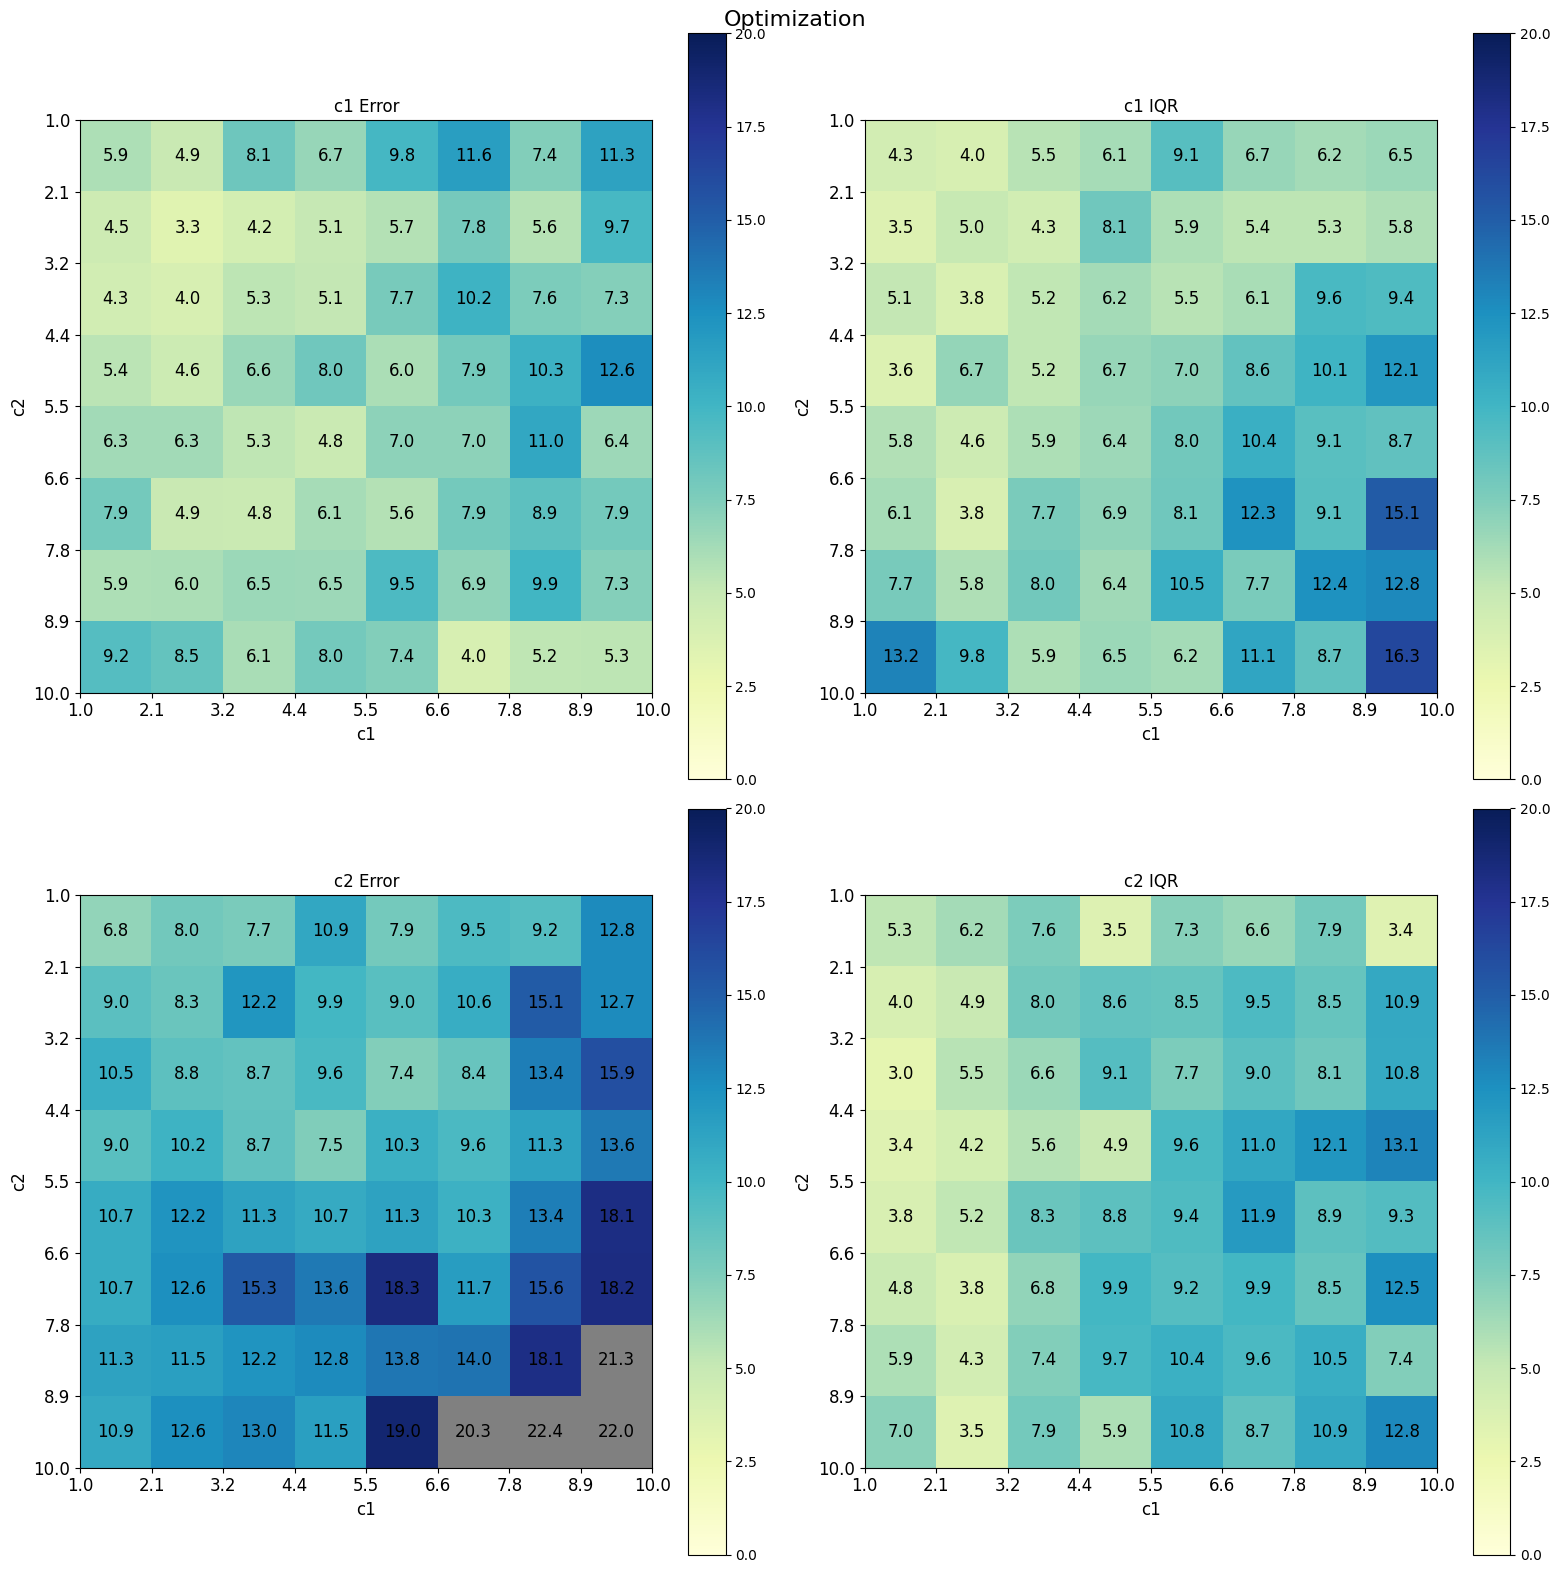

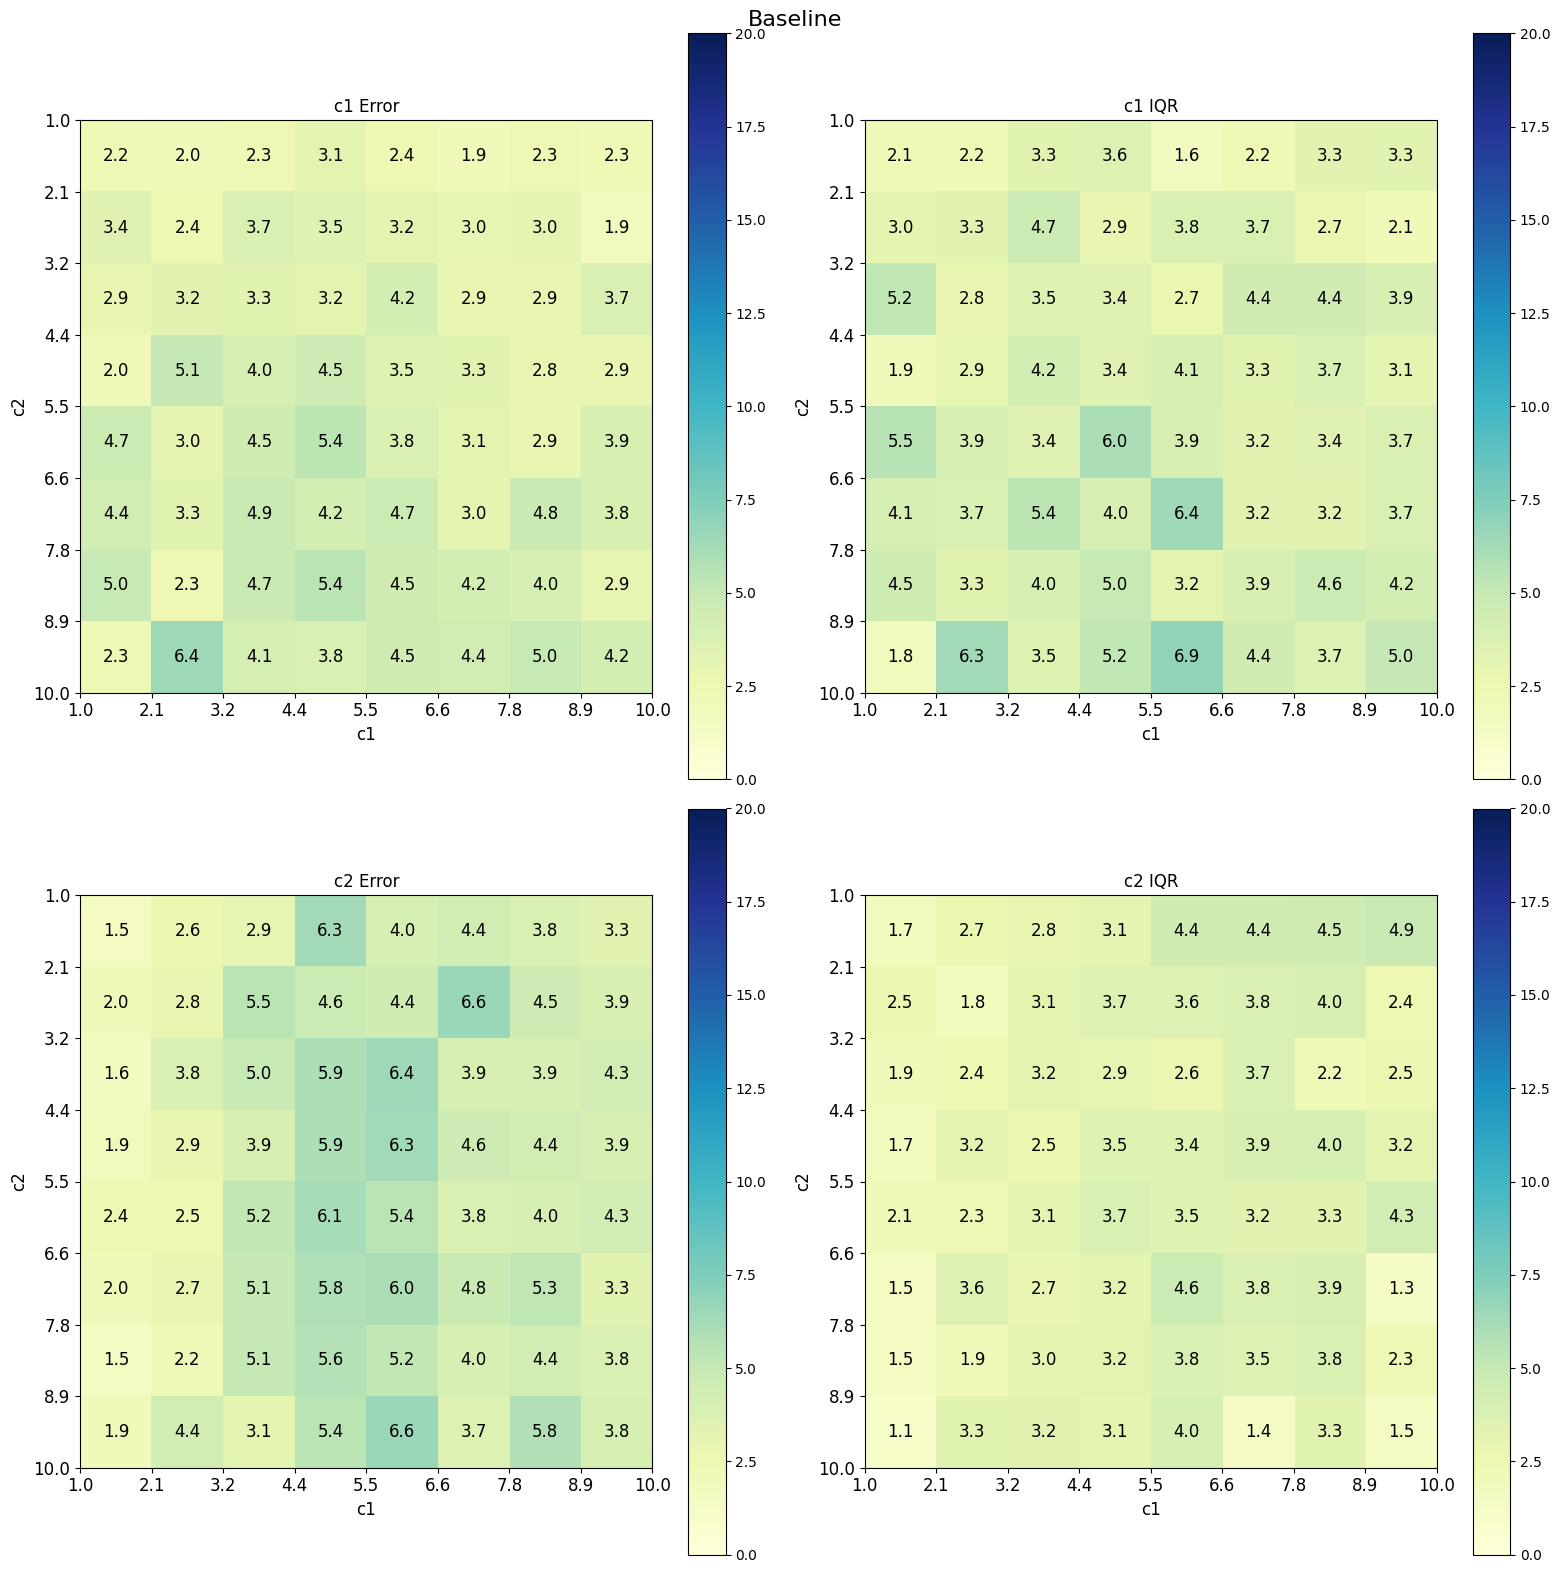

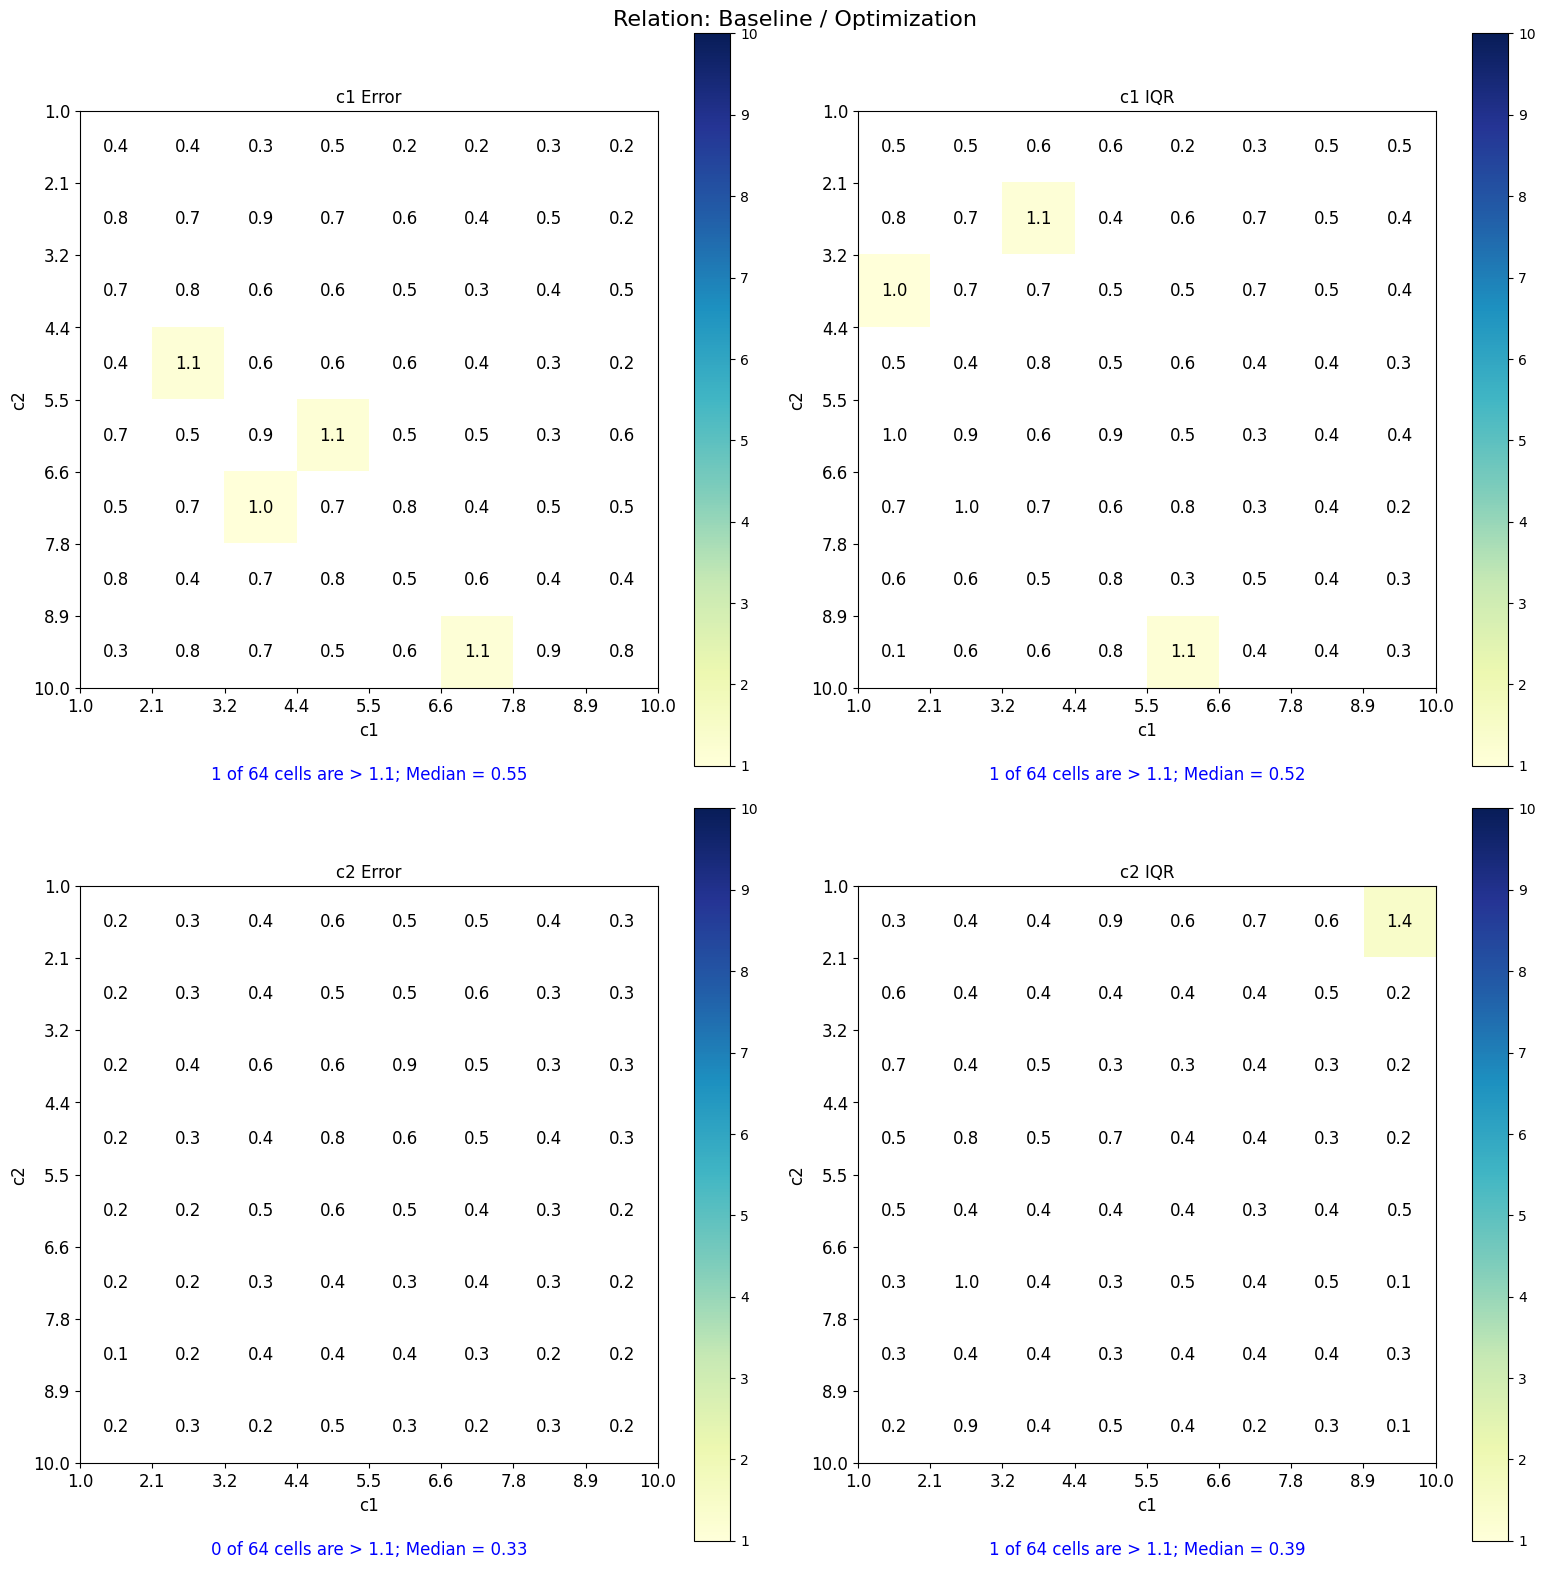

In [49]:
heatmap_lw=0
heatmap_up = 20
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/ch_roll.png", title="Optimization", lw=heatmap_lw, up=heatmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/ch_roll_base.png", title="Baseline", lw=heatmap_lw, up=heatmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/ch_roll_rel.png", title="Relation: Baseline / Optimization", lw=1, up=10, count_greater_then=1.1)

In [11]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/ch_roll.pkl', 'wb') as f:
    pickle.dump(data, f)
